<a href="https://colab.research.google.com/github/Raph-09/FAKE-NEWS-PREDICTION/blob/main/(LSTM)_Fake_News_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AIM:** Predict Fake News using  LSTM


**mount to google drive**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**import libraries**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dropout
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**load data**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/datascience_file/fake-news.csv')

**Explore data**

In [4]:
#check the first 5
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
#check bottom 5
df.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [6]:
#check length of data
len(df)

20800

In [7]:
#check no of rows and columns
df.shape

(20800, 5)

In [8]:
#check for null values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
#make copy of df
df_copy = df.copy()

In [10]:
#delete the null values
df_copy.dropna(inplace=True)

In [11]:
#check if null values are still there
df_copy.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [12]:
#split into dependent and independent features
x=df_copy.title
y=df_copy.label

In [13]:
#check unique values in y
y.nunique()

2

In [14]:
#reset the index for easy iteration 
df_copy.reset_index(inplace=True)

**Word cloud for the first title**

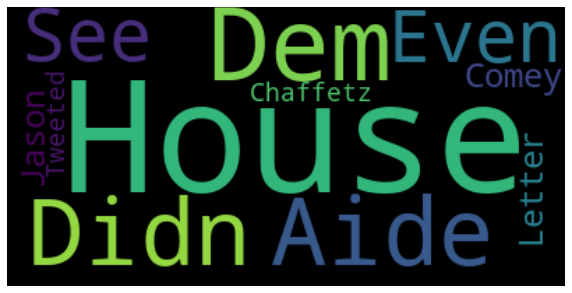

In [34]:
text = df_copy.title[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(10,30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Data Preprocessing**

In [15]:
st = PorterStemmer()
corpus = []
for i in range(0, len(df_copy)):
    doc = re.sub('[^a-zA-Z]', ' ', df_copy['title'][i])
    doc = doc.lower()
    doc = doc.split()
    
    doc = [st.lem(word) for word in doc if not word in stopwords.words('english')]
    doc = ' '.join(doc)
    corpus.append(doc)

In [16]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

**One hot encoding**

In [ ]:
vocabulary_size = 10000

In [ ]:
onehot_vec=[one_hot(words,vocabulary_size)for words in corpus] 
onehot_vec[0]

[7216, 6617, 5920, 4807, 5572, 9181, 8812, 6613, 9627, 4925]

In [ ]:
#to choose sentence length
max_length = max(onehot_vec)
s=0
for i in max_length:
   s+=1
print(s)


10


**Word Embedding**

In [ ]:
#maximum sentence length is 10 but i will go with 15
sentence_length=15
embedded_vec=pad_sequences(onehot_vec,padding='pre',maxlen=sentence_length)
print(embedded_vec)

[[   0    0    0 ... 6613 9627 4925]
 [   0    0    0 ... 1367 5148  402]
 [   0    0    0 ... 2258  855 3565]
 ...
 [   0    0    0 ... 6077 5157 4421]
 [   0    0    0 ... 3069 7523 7846]
 [   0    0    0 ... 2552 7129 7863]]


In [ ]:
#lets convert both x and y to array
x=np.array(embedded_vec)
y=np.array(y)

In [ ]:
#check if they are equal
print(len(x),len(y))

18285 18285


**Split into train and test sets**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

**Model Building**

In [ ]:
## model
embedding_vector_features=100
model=Sequential()
model.add(Embedding(vocabulary_size,embedding_vector_features,input_length=sentence_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
### training the data
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=50)

Epoch 1/10
256/256 [==============================] - 8s 32ms/step - loss: 1.3199e-05 - accuracy: 1.0000 - val_loss: 0.7725 - val_accuracy: 0.9127
Epoch 2/10
256/256 [==============================] - 8s 32ms/step - loss: 1.0797e-05 - accuracy: 1.0000 - val_loss: 0.7794 - val_accuracy: 0.9081
Epoch 3/10
256/256 [==============================] - 8s 32ms/step - loss: 8.8334e-06 - accuracy: 1.0000 - val_loss: 0.7843 - val_accuracy: 0.9087
Epoch 4/10
256/256 [==============================] - 8s 32ms/step - loss: 7.3432e-06 - accuracy: 1.0000 - val_loss: 0.8002 - val_accuracy: 0.9098
Epoch 5/10
256/256 [==============================] - 8s 32ms/step - loss: 5.9326e-06 - accuracy: 1.0000 - val_loss: 0.8286 - val_accuracy: 0.9096
Epoch 6/10
256/256 [==============================] - 8s 32ms/step - loss: 5.3991e-06 - accuracy: 1.0000 - val_loss: 0.8231 - val_accuracy: 0.9087
Epoch 7/10
256/256 [==============================] - 8s 32ms/step - loss: 4.6512e-06 - accuracy: 1.0000 - val_loss: 0

In [ ]:
#it seems to overfit so lets add a dropout layer
## dropout
embedding_vector_features=100
model=Sequential()
model.add(Embedding(vocabulary_size,embedding_vector_features,input_length=sentence_length))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
### training the data after applying dropout
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=50)

Epoch 1/10
256/256 [==============================] - 11s 36ms/step - loss: 0.4203 - accuracy: 0.8055 - val_loss: 0.1857 - val_accuracy: 0.9205
Epoch 2/10
256/256 [==============================] - 9s 33ms/step - loss: 0.1354 - accuracy: 0.9489 - val_loss: 0.1932 - val_accuracy: 0.9247
Epoch 3/10
256/256 [==============================] - 8s 33ms/step - loss: 0.0943 - accuracy: 0.9644 - val_loss: 0.2376 - val_accuracy: 0.9254
Epoch 4/10
256/256 [==============================] - 9s 33ms/step - loss: 0.0661 - accuracy: 0.9764 - val_loss: 0.2227 - val_accuracy: 0.9236
Epoch 5/10
256/256 [==============================] - 9s 33ms/step - loss: 0.0440 - accuracy: 0.9864 - val_loss: 0.2431 - val_accuracy: 0.9216
Epoch 6/10
256/256 [==============================] - 9s 33ms/step - loss: 0.0283 - accuracy: 0.9918 - val_loss: 0.3085 - val_accuracy: 0.9202
Epoch 7/10
256/256 [==============================] - 9s 33ms/step - loss: 0.0198 - accuracy: 0.9945 - val_loss: 0.3247 - val_accuracy: 0.919

In [ ]:
y_pred

array([1], dtype=int32)

**Evaluate performance**

In [ ]:
y_pred=(model.predict(x_test) > 0.5).astype("int32")
print(confusion_matrix(y_test,y_pred))
print('Accuracy:{}'.format(accuracy_score(y_test,y_pred)))

[[2791  266]
 [ 183 2246]]
Accuracy:0.9181553044112286
